In [1]:
import pandas as panda
import numpy as nump


In [2]:
file   = "C:\\Users\\krmch\\OneDrive\\Desktop\\diabetes.csv"


Question 1 Part 1 subquestion 1 

In [3]:
df = panda.read_csv(file)
print(df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148           72.0             35        0  33.6   
1            1       85           66.0             29        0  26.6   
2            8      183           64.0              0        0  23.3   
3            1       89           66.0             23       94  28.1   
4            0      137           40.0             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   15        1  


Question 1 Part 1 subquestion 2

In [4]:
rows, columns = df.shape
print(f"no of rows: {rows}")
print(f"no of cols : {columns}")


no of rows: 788
no of cols : 9


Question 1 Part 1 subquestion 3

In [5]:

mean_age = df['Age'].mean()
standard_deviation_age = df['Age'].std()

minimum_age = df['Age'].min()
maximum_age = df['Age'].max()


print(f"mean age: {mean_age}")
print(f"Standard dev. of age: {standard_deviation_age}")
print(f"minimum age: {minimum_age}")
print(f"maximum age: {maximum_age}")



mean age: 33.21573604060914
Standard dev. of age: 11.819874550957666
minimum age: 12
maximum age: 81


Question 1 Part 1 subquestion 4

In [7]:
mode_of_age = df['Age'].mode()
print(f"mode of Age: {mode_of_age}")




if len(mode_of_age) == 1:
    print("data is unimodal.")
elif len(mode_of_age) == 2:
    print("data is bimodal .")
else:
    print("data is multimodal.")


mode of Age: 0    22
Name: Age, dtype: int64
data is unimodal.


Question 1 Part 1 subquestion 5

In [8]:
lower_quart_age =   df['Age'].quantile(0.25)
upper_quart_age = df['Age'].quantile(0.75)

print(f"Quartile 1 of Age: {lower_quart_age}")
print(f"Quartile 3 of Age: {upper_quart_age}")


Quartile 1 of Age: 24.0
Quartile 3 of Age: 41.0


Question 1 Part 1 subquestion 6

In [9]:
IQR_of_age  = upper_quart_age -   lower_quart_age



print(f"interquartile range of Age: {IQR_of_age}")


interquartile range of Age: 17.0


Question 1 Part 1 subquestion 7

In [11]:
median_age = df['Age'].median()

minimum_age = df['Age'].min()
maximum_age = df['Age'].max()


print(f"Max: {maximum_age}")
print(f"Min: {lower_quart_age}")

print(f"Quartile 1: {lower_quart_age}")
print(f"Quartile 3: {upper_quart_age}")

print(f"Median: {median_age}")



Max: 81
Min: 24.0
Quartile 1: 24.0
Quartile 3: 41.0
Median: 29.0


Question 1 Part II

In [12]:
import matplotlib.pyplot as plt
import seaborn as sea

Question 1 Part II subquestion 1

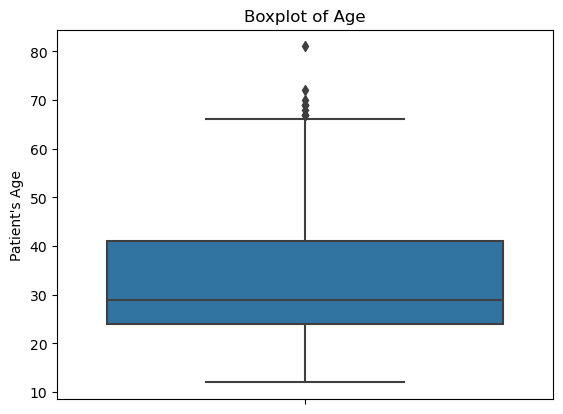

In [11]:
sea.boxplot(y=df['Age'])


# make title and axis label 
plt.title('Age boxplot')

plt.ylabel("patient's age")


# show the box plot 
plt.show()


Question 1 Part II subquestion 2

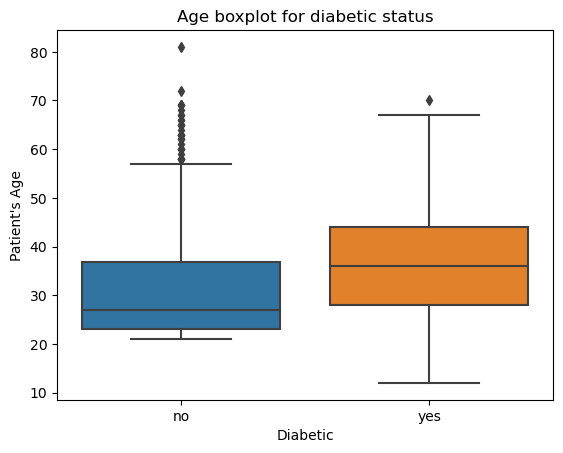

In [13]:
sea.boxplot(x=df['Outcome'],   y=df['Age'])

# title and x label 
plt.title('Age boxplot for diabetic status')
plt.xlabel('Diabetic')



plt.xticks(ticks=[0, 1], labels=['no',  'yes'])

# y label 
plt.ylabel("Patient's Age")

# show the boxplot 
plt.show()


Question 1 Part II subquestion 3

It is evident from the boxplot that there is a positive correlation between age and the presence of diabetes. This is because the distribution for age is skewed upwards for patients that are diabetic as compared to patients that are not and the median is higher. This correlation however is not conclusive evidence that age is causally related to diabetes. 

Question 1 Part II subquestion 4

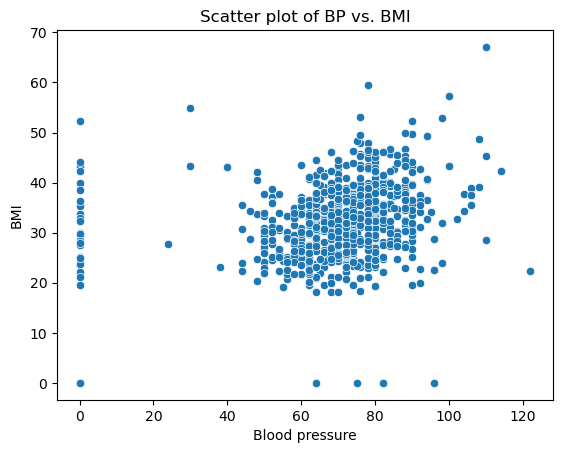

In [14]:
sea.scatterplot(x=df['BloodPressure'],  y=df['BMI'])

# make the title 
plt.title('Scatter plot of BP vs. BMI')

# label the axes 
plt.xlabel('Blood pressure')
plt.ylabel('BMI')


# show the scatter plot 
plt.show()


Question 1 Part II subquestion 5

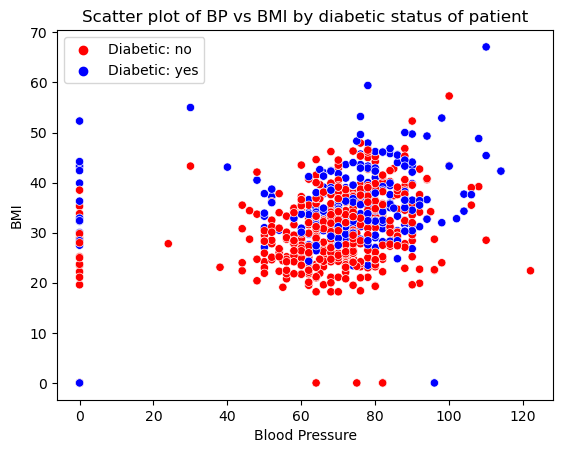

In [15]:
sea.scatterplot(x=df['BloodPressure'], y=df['BMI'], hue=df['Outcome'], palette={0: 'red', 1: 'blue'},   legend='full')


plt.title('Scatter plot of BP vs BMI by diabetic status of patient')



# make the x and y labels 
plt.xlabel('Blood Pressure')
plt.ylabel('BMI')



legend_labels, _= plt.gca().get_legend_handles_labels()
plt.legend(legend_labels, ['Diabetic: no', 'Diabetic: yes'])

# show the scatter plot 
plt.show()


Question 1 Part II subquestion 6

Judging from the scatter plot there is 1) a positive correlation between diabetes and and BMI as all blue dots are skewed upwards compared to red dots and a 2) weaker positive correlation between Blood pressure and diabetes. The blue dots have a subtle right skew and so there may be a weak positive correlation betweejn higher blood pressures and diabetes.

Question 1 Part III

Question 1 Part III subquestion 1 

In [16]:

patients_high_insulin =   df[df['Insulin'] > 400]


number_high_insulin = patients_high_insulin['Outcome'].value_counts()

In [17]:
print("0f patients with insulin > 400:")


print(f"diabetic:  {number_high_insulin.get(1, 0)}")
print(f"Non-diabetic: {number_high_insulin.get(0, 0)}")


0f patients with insulin > 400:
diabetic:  12
Non-diabetic: 8


Question 1 Part III subquestion 2

In [18]:

x_patients = df[(df['Insulin'] > 400) &  (df['Glucose'] > 175)]


count_x = x_patients['Outcome'].value_counts()

print("Of patients with insulin > 400 and also glucose > 175:")


print(f"Diabetic: {count_x.get(1, 0)}")
print(f"non-diabetic: {count_x.get(0, 0)}")


Of patients with insulin > 400 and also glucose > 175:
Diabetic: 5
non-diabetic: 1


Question 1 Part III subquestion 3

In [19]:
# Filter and calculate mean glucose level
mean_glucose = df[(df['Pregnancies'] > 5) &  (df['Age'] > 45)]['Glucose'].mean()

print(f"mean glucose level for patients over 45 with more than 5 pregnancies: {mean_glucose:.2f}")


mean glucose level for patients over 45 with more than 5 pregnancies: 135.37


Question 1 Part III subquestion 4

In [20]:
unique_pregnancies = df['Pregnancies'].nunique()

print(f"unqiue values for pregnancy: {unique_pregnancies}")


unqiue values for pregnancy: 17


Question 1 Part III subquestion 5 

In [21]:
preg_group = df.groupby('Pregnancies')['Outcome'].value_counts(normalize=True).unstack().fillna(0) 

print("Percentage of each diabetic status for each number of pregnancies :")
print(preg_group)


Percentage of each diabetic status for each number of pregnancies :
Outcome             0         1
Pregnancies                    
0            0.660714  0.339286
1            0.773050  0.226950
2            0.824074  0.175926
3            0.644737  0.355263
4            0.666667  0.333333
5            0.637931  0.362069
6            0.680000  0.320000
7            0.434783  0.565217
8            0.450000  0.550000
9            0.344828  0.655172
10           0.583333  0.416667
11           0.363636  0.636364
12           0.555556  0.444444
13           0.454545  0.545455
14           0.000000  1.000000
15           0.000000  1.000000
17           0.000000  1.000000


Question 2 Part I subquestion 1 

In [22]:
d = df.duplicated()


print(d)


0      False
1      False
2      False
3      False
4      False
       ...  
783     True
784     True
785     True
786     True
787     True
Length: 788, dtype: bool


Question 2 Part I subquestion 2

In [23]:
df2 = df.drop_duplicates()


Question 2 Part I subquestion 3

In [24]:
print("Dimensions after duplicates removed", df2.shape)


Dimensions after duplicates removed (768, 9)


Question 2 Part I subquestion 4

In [25]:
duplicated_count = len(df) - len(df2)

print(f"There were {duplicated_count} duplicate rows before cleaning .")


There were 20 duplicate rows before cleaning .


question 2 part II subquestion 1 

In [27]:
miss_bp = df2['BloodPressure'].isnull().sum()
print(f"how many missing values in 'BloodPressure' column?: {miss_bp}")


how many missing values in 'BloodPressure' column?: 23


question 2 part II subquestion 2

In [28]:
df3 = df2.dropna(subset=['BloodPressure'])


question 2 part II subquestion 3

In [29]:
cols = ['Pregnancies', 'BMI', 'DiabetesPedigreeFunction',  'BloodPressure', 'Glucose', 'SkinThickness', 'Insulin', 'Age']
df4 = df3[cols].copy()


question 2 part II subquestion 4

In [31]:
from sklearn.model_selection import train_test_split

training_df, testing_df = train_test_split(df4, test_size=0.1, random_state=42)


question 2 part II subquestion 5

In [32]:
evaluation_df = testing_df.copy()
testing_df['Glucose'] = nump.nan


question 2 part II subquestion 6

In [33]:
from sklearn.metrics import mean_squared_error

mean_glucose = training_df['Glucose'].mean()


testing_df['Glucose_mean'] = mean_glucose


rmse_mean = nump.sqrt(mean_squared_error(evaluation_df['Glucose'], testing_df['Glucose_mean']))
print(f"RMSE (mean): {rmse_mean:.2f}")


RMSE (mean): 34.09


question 2 part II subquestion 7

In [34]:
median_glucose = training_df['Glucose'].median()


testing_df['Glucose_median'] = median_glucose


rmse_median = nump.sqrt(mean_squared_error(evaluation_df['Glucose'], testing_df['Glucose_median']))
print(f"RMSE (median) : {rmse_median:.2f}")


RMSE (median) : 34.43


question 2 part II subquestion 8

In [35]:
from sklearn.impute import SimpleImputer

i = SimpleImputer(strategy='most_frequent')
testing_df['Glucose_mode'] = i.fit(training_df[['Glucose']]).transform(testing_df[['Glucose']])


rmse_mode = nump.sqrt(mean_squared_error(evaluation_df['Glucose'], testing_df['Glucose_mode']))
print(f"RMSE (mode): {rmse_mode:.2f}")



RMSE (mode): 41.11


question 2 part II subquestion 9

In [41]:
from sklearn.impute import KNNImputer

impu = KNNImputer(n_neighbors=3)
testing_df_imputed = impu.fit_transform(training_df.append(testing_df.drop(columns=['Glucose_mean',   'Glucose_median',   'Glucose_mode'])))


testing_df['Glucose_knn'] = testing_df_imputed[-len(testing_df):][:, 1] 


rmse2 = nump.sqrt(mean_squared_error(evaluation_df['Glucose'], testing_df['Glucose_knn']))


print(f"RMSE (KNN): {rmse2:.2f}")


RMSE (KNN): 95.01


C:\Users\krmch\AppData\Local\Temp\ipykernel_22868\4246661979.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  testing_df_imputed = impu.fit_transform(training_df.append(testing_df.drop(columns=['Glucose_mean',   'Glucose_median',   'Glucose_mode'])))


question 2 part II subquestion 10

In [39]:
rmse_vals = {'Mean Imputation': rmse_mean,    'Median Imputation': rmse_median, 'Mode Imputation': rmse_mode, 'KNN Imputation': rmse_knn}
best = min(rmse_vals, key=rmse_vals.get)

print(f"Best imputer because its RMSE is lowest: {best}")


Best imputer because its RMSE is lowest: Mean Imputation


In [ ]:
#end